# Guided Project: Predicting House Sale Prices

## Introduction

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('AmesHousing.tsv', '\t')

In [3]:
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
data.dtypes

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
                   ...   
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu       object
Garage Type 

In [5]:
def transform_features(df):
    return df

In [6]:
def select_features(x):
    return x[['Gr Liv Area', 'SalePrice']]

In [7]:
def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    numerical_cols_train = train.select_dtypes(include = ['int', 'float'])
    numeric_test = test.select_dtypes(include = ['int', 'float'])
    features = df.columns
    features = features.drop('SalePrice')
    target = train['SalePrice']
    
    lnr = linear_model.LinearRegression()
    lnr.fit(train[features], target)
    pred = lnr.predict(test[features])
    mse = mean_squared_error(pred, test['SalePrice'])
    rmse = np.sqrt(mse)
    return rmse

In [8]:
train_and_test(select_features(transform_features(data)))

57088.25161263909

## Feature Engineering

Handle missing values:
* All columns:
    * Drop any with 5% or more missing values for now.
* Text columns:
    * Drop any with 1 or more missing values for now.
* Numerical columns:
    * For columns with missing values, fill in with the most common value in that column
    
1: All columns: Drop any with 5% or more missing values for now.

In [9]:
data.shape

(2930, 82)

In [10]:
missing_vals = data.isnull().sum()
missing_5pct = missing_vals[missing_vals >.05*data.shape[0]]
missing_5pct

Lot Frontage      490
Alley            2732
Fireplace Qu     1422
Garage Type       157
Garage Yr Blt     159
Garage Finish     159
Garage Qual       159
Garage Cond       159
Pool QC          2917
Fence            2358
Misc Feature     2824
dtype: int64

In [11]:
data = data.drop(missing_5pct.index, axis = 1)

In [12]:
data.shape

(2930, 71)

2: Text columns: Drop any with 1 or more missing values for now.

In [13]:
txt_cols = data.select_dtypes(include = 'object')
txt_cols_missing = txt_cols.isnull().sum()>0
txt_delete = txt_cols_missing[txt_cols_missing == True]
data = data.drop(txt_delete.index, axis = 1)


In [14]:
data.shape

(2930, 64)

3: Numerical columns: For columns with missing values, fill in with the most common value in that column

In [15]:
num_cols = data.select_dtypes(include = ['int','float']).isnull().sum()
fill_num_cols = num_cols[num_cols >0]
fill_num_cols.sort_values(ascending = False)

Mas Vnr Area      23
Bsmt Half Bath     2
Bsmt Full Bath     2
Garage Area        1
Garage Cars        1
Total Bsmt SF      1
Bsmt Unf SF        1
BsmtFin SF 2       1
BsmtFin SF 1       1
dtype: int64

In [16]:
modes = data[fill_num_cols.index].mode()
modes

,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath,Garage Cars,Garage Area
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [17]:
for i in modes.columns:
    print(modes[i][0])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0
0.0


In [18]:
for i in modes.columns:
    data[i] = data[i].fillna(modes[i][0])
    
data[modes.columns].isnull().sum().value_counts()

0    9
dtype: int64

In [19]:
data.isnull().sum().value_counts()

0    64
dtype: int64

What new features can we create, that better capture the information in some of the features?

In [20]:
years_sold = data['Yr Sold'] - data['Year Built']
years_sold[years_sold < 0]


2180   -1
dtype: int64

In [21]:
years_since_remod = data['Yr Sold'] - data['Year Remod/Add']
years_since_remod[years_since_remod < 0]



1702   -1
2180   -2
2181   -1
dtype: int64

In [22]:
## Create new columns
data['Years Before Sale'] = years_sold
data['Years Since Remod'] = years_since_remod

## Drop rows with negative values for both of these new features
data = data.drop([1702, 2180, 2181], axis=0)

## No longer need original year columns
data = data.drop(["Year Built", "Year Remod/Add"], axis = 1)


Drop columns that:

* aren't useful for ML
* leak data about the final sale, read more about columns here


In [23]:
## Drop columns that aren't useful for ML
data = data.drop(["PID", "Order"], axis=1)

## Drop columns that leak info about the final sale
data = data.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)

Let's update transform_features()

In [24]:
def transform_features(df):
    num_missing = df.isnull().sum()
    drop_missing_cols = num_missing[(num_missing > len(df)/20)].sort_values()
    df = df.drop(drop_missing_cols.index, axis=1)
    
    text_mv_counts = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    df = df.drop(drop_missing_cols_2.index, axis=1)
    
    num_missing = df.select_dtypes(include=['int', 'float']).isnull().sum()
    fixable_numeric_cols = num_missing[(num_missing < len(df)/20) & (num_missing > 0)].sort_values()
    replacement_values_dict = df[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
    df = df.fillna(replacement_values_dict)
    
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Before Sale'] = years_sold
    df['Years Since Remod'] = years_since_remod
    df = df.drop([1702, 2180, 2181], axis=0)

    df = df.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type", "Year Built", "Year Remod/Add"], axis=1)
    return df

In [25]:
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")

train_and_test(select_features(transform_features(df)))

55275.36731241307

## Feature Selection

Generate a correlation heatmap matrix of the numerical features in the training data set.

In [26]:
d = transform_features(df)
numeric = d.select_dtypes(include = ['int', 'float'])
numeric_corrs = d[numeric.columns].corr()

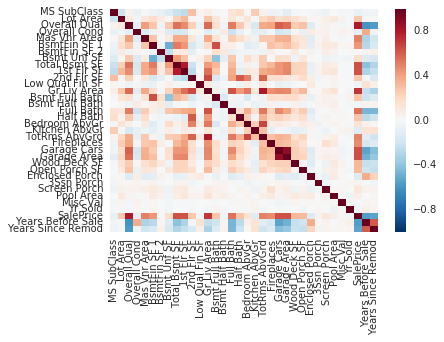

In [27]:
from seaborn import heatmap
% matplotlib inline
heatmap(numeric_corrs)

Let's isolate only the correlations with SalePrice and show them in absolute values

In [32]:
Price_corrs = numeric_corrs['SalePrice'].abs().sort_values(ascending = False)
Price_corrs

SalePrice            1.000000
Overall Qual         0.801206
Gr Liv Area          0.717596
Garage Cars          0.648361
Total Bsmt SF        0.644012
Garage Area          0.641425
1st Flr SF           0.635185
Years Before Sale    0.558979
Full Bath            0.546118
Years Since Remod    0.534985
Mas Vnr Area         0.506983
TotRms AbvGrd        0.498574
Fireplaces           0.474831
BsmtFin SF 1         0.439284
Wood Deck SF         0.328183
Open Porch SF        0.316262
Half Bath            0.284871
Bsmt Full Bath       0.276258
2nd Flr SF           0.269601
Lot Area             0.267520
Bsmt Unf SF          0.182751
Bedroom AbvGr        0.143916
Enclosed Porch       0.128685
Kitchen AbvGr        0.119760
Screen Porch         0.112280
Overall Cond         0.101540
MS SubClass          0.085128
Pool Area            0.068438
Low Qual Fin SF      0.037629
Bsmt Half Bath       0.035875
3Ssn Porch           0.032268
Yr Sold              0.030358
Misc Val             0.019273
BsmtFin SF

Now let's isolate only the labels with correlations above 0.4

In [33]:
Large_pr_corrs = Price_corrs[Price_corrs > 0.4]
Large_pr_corrs

SalePrice            1.000000
Overall Qual         0.801206
Gr Liv Area          0.717596
Garage Cars          0.648361
Total Bsmt SF        0.644012
Garage Area          0.641425
1st Flr SF           0.635185
Years Before Sale    0.558979
Full Bath            0.546118
Years Since Remod    0.534985
Mas Vnr Area         0.506983
TotRms AbvGrd        0.498574
Fireplaces           0.474831
BsmtFin SF 1         0.439284
Name: SalePrice, dtype: float64

In [37]:
def select_features(df, coeff_threshold=0.4, uniq_threshold=10):
    numerical_df = df.select_dtypes(include=['int', 'float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis=1)
    
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    
    transform_cat_cols = []
    for col in nominal_features:
        if col in df.columns:
            transform_cat_cols.append(col)

    uniqueness_counts = df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
    drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
    df = df.drop(drop_nonuniq_cols, axis=1)
    
    text_cols = df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1).drop(text_cols,axis=1)
    
    return df

def train_and_test(df, k=0):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    lr = linear_model.LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]

        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)

        return rmse
    
    if k == 1:
        # Randomize *all* rows (frac=1) from `df` and return
        shuffled_df = df.sample(frac=1, )
        train = df[:1460]
        test = df[1460:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions_one = lr.predict(test[features])        
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])        
       
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        print(rmse_one)
        print(rmse_two)
        return avg_rmse
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr.fit(train[features], train["SalePrice"])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        print(rmse_values)
        avg_rmse = np.mean(rmse_values)
        return avg_rmse

df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, k=4)

rmse
    

NameError: name 'KFold' is not defined